<a href="https://colab.research.google.com/github/jhaluska10/Keystroke_Dynamics_Analysis/blob/main/KNN_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP
This section installs the proper dependencies needed and also downloads and formats the data we will be using to train our KNN models.

This sec

In [1]:
import numpy as np  
import pandas as pd 

import matplotlib.pyplot as plt
 
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
!wget -q https://raw.githubusercontent.com/jhaluska10/kaggle/main/kaggle.json

In [3]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!kaggle competitions download  keystroke-dynamics-challenge-1
! unzip  keystroke-dynamics-challenge-1.zip


  0% 0.00/53.7k [00:00<?, ?B/s]
100% 53.7k/53.7k [00:00<00:00, 58.8MB/s]
Archive:  keystroke-dynamics-challenge-1.zip
  inflating: submit.csv              
  inflating: test.csv                
  inflating: train.csv               


In [45]:
keystroke_info = pd.read_csv('train.csv')

In [46]:
keystroke_info[keystroke_info['user'] == 1]


,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
0,1,0,120,216,312,424,496,592,664,808,...,1712,1760,1992,2064,2376,2448,2584,2632,2752,2824
1,1,0,95,168,265,360,455,527,599,736,...,1423,1471,1664,1711,1880,1952,2039,2111,2231,2279
2,1,0,71,143,231,783,903,1087,1159,1351,...,2039,2111,2271,2343,2487,2559,2679,2751,2871,2926
3,1,0,95,144,263,353,431,760,832,1159,...,3151,3223,3415,3463,3631,3703,3815,3887,3983,4055
4,1,0,70,166,238,310,406,526,598,710,...,1310,1382,1543,1605,1734,1806,1926,1998,2086,2182
5,1,0,72,144,240,312,413,520,591,712,...,1522,1567,1770,1807,1968,2039,2160,2231,2352,2423
6,1,0,95,143,240,335,423,592,663,807,...,1615,1696,1847,1895,2063,2135,2255,2327,2423,2495
7,1,0,74,144,240,312,376,473,544,688,...,1424,1518,1664,1712,1872,1968,2091,2160,2280,2328


# Prepare Data


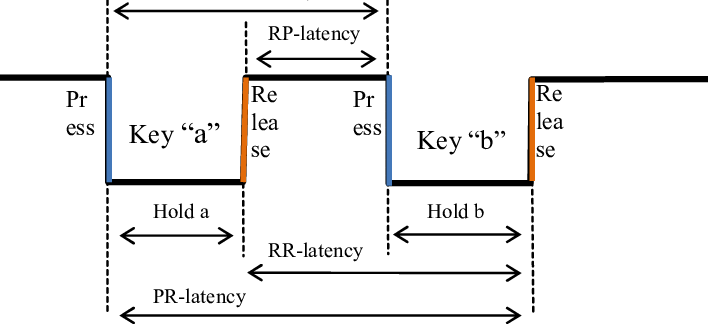


This image from https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7358772 guides our data manipulation.
We will create hold, Release-Release latency, Release-Press latency, and Press-Press latency, Trigraph latenct, digraph latency, hold duration and the average and standard deviation for these values for each individual user entry. 
We will also create word latency for the word "united" and "states".


In [47]:
 
for i in range(13):
    if(i != 0):
      keystroke_info['PP-'+str(i)] = keystroke_info['press-'+str(i)] - keystroke_info['press-'+str(i-1)]
      keystroke_info['RP-'+str(i)] = keystroke_info['press-'+str(i)] - keystroke_info['release-'+str(i-1)]
      keystroke_info['RR-'+str(i)] = keystroke_info['release-'+str(i)] - keystroke_info['release-'+str(i-1)]
    keystroke_info['HD-'+str(i)] = keystroke_info['release-'+str(i)] - keystroke_info['press-'+str(i)]

#MAY WANT TO ADD DIGRapHS laTER. AM UNSURE AS OF NOW'
Latency_metric = ['HD', 'PP' , 'RR' , 'RP', "DG", "TG"]
#Latency_metric = [ 'PP' , 'RR' , 'RP']



keystroke_info["united_latency"] =   keystroke_info['release-5'] - keystroke_info['press-0']
keystroke_info["states_latency"] =   keystroke_info['release-12'] - keystroke_info['press-7']

for i in range(1,13):
  keystroke_info['DG-'+str(i)] = keystroke_info['release-'+str(i)] - keystroke_info['press-'+str(i-1)]

for i in range(2,13):
  keystroke_info['TG-'+str(i)] = keystroke_info['release-'+str(i)] - keystroke_info['press-'+str(i-2)]

for val in Latency_metric:
        lists = [col for col in keystroke_info.columns if val in str(col)]
        print(lists)
        keystroke_info[str(val)+'-mean'] = keystroke_info[lists].mean(axis=1)
        keystroke_info[str(val)+'-std'] = keystroke_info[lists].std(axis=1)


['HD-0', 'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9', 'HD-10', 'HD-11', 'HD-12']
['PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12']
['RR-1', 'RR-2', 'RR-3', 'RR-4', 'RR-5', 'RR-6', 'RR-7', 'RR-8', 'RR-9', 'RR-10', 'RR-11', 'RR-12']
['RP-1', 'RP-2', 'RP-3', 'RP-4', 'RP-5', 'RP-6', 'RP-7', 'RP-8', 'RP-9', 'RP-10', 'RP-11', 'RP-12']
['DG-1', 'DG-2', 'DG-3', 'DG-4', 'DG-5', 'DG-6', 'DG-7', 'DG-8', 'DG-9', 'DG-10', 'DG-11', 'DG-12']
['TG-2', 'TG-3', 'TG-4', 'TG-5', 'TG-6', 'TG-7', 'TG-8', 'TG-9', 'TG-10', 'TG-11', 'TG-12']


# Model Param Setup
Since KNN is guided learning we can have influence on the model by selecting the parameters to train with. We happened to see from the graphs above that the hold duration for individual users did not seem to follow a pattern as closley as the other latencies. Thus, in the code cells below we are creating combinations of parameters to use in testing and building our model. It is used just to set up everything. We are simply creating a 2-D array in which the inner arrays represent different parameter combinations. 


In [48]:

HDs = []
for i in range(13):
  HDs.append('HD-'+str(i))
HDs.append('HD-mean')
HDs.append('HD-std')
PPs = []
RPs =[]
RRs = []
for i in range(1,13):
  PPs.append('PP-'+str(i))
  RPs.append('RP-'+str(i))
  RRs.append('RR-'+str(i))
PPs.append('PP-mean' )
RPs.append('RP-mean')
RRs.append('RR-mean')
PPs.append('PP-std' )
RPs.append('RP-std')
RRs.append('RR-std')


DGs = []
for i in range(1,13):
    DGs.append('DG-'+str(i)) 
TGs = []
for i in range(2,13):
  TGs.append('TG-'+str(i)) 


In [49]:
params = []
allparam = []
allparam.append("states_latency")
allparam.append("united_latency")
allparam.extend(PPs)
allparam.extend(RRs)
allparam.extend(RPs)
allparam.extend(HDs)
allparam.extend(DGs)
allparam.extend(TGs)
params.append(allparam)

just_digraphs = []
just_digraphs.append("states_latency")
just_digraphs.append("united_latency")
just_digraphs.extend(PPs)
just_digraphs.extend(RRs)
just_digraphs.extend(RPs)
just_digraphs.extend(HDs)
just_digraphs.extend(DGs)
params.append(just_digraphs)

just_digraphs_no_Word = []
just_digraphs_no_Word.extend(PPs)
just_digraphs_no_Word.extend(RRs)
just_digraphs_no_Word.extend(RPs)
just_digraphs_no_Word.extend(HDs)
just_digraphs_no_Word.extend(DGs)
params.append(just_digraphs_no_Word)

just_trigraphs = []
just_trigraphs.append("states_latency")
just_trigraphs.append("united_latency")
just_trigraphs.extend(PPs)
just_trigraphs.extend(RRs)
just_trigraphs.extend(RPs)
just_trigraphs.extend(HDs)
just_trigraphs.extend(TGs)
params.append(just_trigraphs)

# Comment: I think no word means no states_latency & no united_latency. I see these are included in "just_trigraphs_noW"

just_trigraphs_noW = []
# just_trigraphs_noW.append("states_latency")
# just_trigraphs_noW.append("united_latency")
just_trigraphs_noW.extend(PPs)
just_trigraphs_noW.extend(RRs)
just_trigraphs_noW.extend(RPs)
just_trigraphs_noW.extend(HDs)
just_trigraphs_noW.extend(TGs)
params.append(just_trigraphs_noW)

# Done 
allparam_noHD = []
allparam_noHD.append("states_latency")
allparam_noHD.append("united_latency")
allparam_noHD.extend(PPs)
allparam_noHD.extend(RRs)
allparam_noHD.extend(RPs)
allparam_noHD.extend(DGs)
allparam_noHD.extend(TGs)
params.append(allparam_noHD)

# Done 
just_digraphs_noHD = []
just_digraphs_noHD.append("states_latency")
just_digraphs_noHD.append("united_latency")
just_digraphs_noHD.extend(PPs)
just_digraphs_noHD.extend(RRs)
just_digraphs_noHD.extend(RPs)
just_digraphs_noHD.extend(DGs)
params.append(just_digraphs_noHD)

# Done 
just_digraphs_no_Word_noHD = []
just_digraphs_no_Word_noHD.extend(PPs)
just_digraphs_no_Word_noHD.extend(RRs)
just_digraphs_no_Word_noHD.extend(RPs)
just_digraphs_no_Word_noHD.extend(DGs)
params.append(just_digraphs_no_Word_noHD)

# Done 
just_trigraphs_noHD = []
just_trigraphs_noHD.append("states_latency")
just_trigraphs_noHD.append("united_latency")
just_trigraphs_noHD.extend(PPs)
just_trigraphs_noHD.extend(RRs)
just_trigraphs_noHD.extend(RPs)
just_trigraphs_noHD.extend(TGs)
params.append(just_trigraphs_noHD)

# Done 
just_trigraphs_noW_noHD = []
# just_trigraphs_noW_noHD.append("states_latency")
# just_trigraphs_noW_noHD.append("united_latency")
just_trigraphs_noW_noHD.extend(PPs)
just_trigraphs_noW_noHD.extend(RRs)
just_trigraphs_noW_noHD.extend(RPs)
just_trigraphs_noW_noHD.extend(TGs)
params.append(just_trigraphs_noW_noHD)

# Done 
no_di_tri_noHD_noW = []
no_di_tri_noHD_noW.extend(PPs)
no_di_tri_noHD_noW.extend(RRs)
no_di_tri_noHD_noW.extend(RPs)
params.append(no_di_tri_noHD_noW)

# Done 
no_di_tri_noHD = []
no_di_tri_noHD.append("states_latency")
no_di_tri_noHD.append("united_latency")
no_di_tri_noHD.extend(PPs)
no_di_tri_noHD.extend(RRs)
no_di_tri_noHD.extend(RPs)
params.append(no_di_tri_noHD)

# Done 
no_di_tri = []
no_di_tri.append("states_latency")
no_di_tri.append("united_latency")
no_di_tri.extend(PPs)
no_di_tri.extend(RRs)
no_di_tri.extend(RPs)
no_di_tri.extend(HDs)
params.append(no_di_tri)

tri_and_di = []
tri_and_di.append("states_latency")
tri_and_di.append("united_latency")
tri_and_di.extend(DGs)
tri_and_di.extend(TGs)
params.append(tri_and_di)

# Done 
tri_and_di_noW = []
tri_and_di_noW.extend(DGs)
tri_and_di_noW.extend(TGs)
params.append(tri_and_di_noW)

# Done 
tri = []
tri.append("states_latency")
tri.append("united_latency")
tri.extend(TGs)
params.append(tri)

# Done
di = []
di.append("states_latency")
di.append("united_latency")
di.extend(DGs)
params.append(di)



# Model Training
With the data now set up we are able to train and evaluate the KNN model. Using GridSearchCV we will be able to determine which N is the best for each of the parameter combinations and will report the accuracy and f1 for the combinations that we have tried.


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

accs = pd.Series()
best_n_accs = pd.Series()

f1s = pd.Series()
best_n_f1s = pd.Series()

for i in params:
  print(i)
  X_train = keystroke_info[i]
  X_train
  y_train = keystroke_info["user"]
  y_train

  ct = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include = "number")),
    remainder="drop"  # all other columns in X will be dropped.
  )

  pipeline = make_pipeline(
      ct,
      KNeighborsClassifier(n_neighbors=5)
  ) 

  grid_search = GridSearchCV(pipeline,
                           param_grid={
                               "kneighborsclassifier__n_neighbors": range(1, 20)
                           },
                           scoring="accuracy",
                           cv=3)

  grid_search.fit(X_train, y_train)
  best = (grid_search.best_estimator_[1].n_neighbors)
   
  accs[str(i)] =  grid_search.cv_results_["mean_test_score"][best]
  best_n_accs[str(i)] = best
   
  ct = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include = "number")),
    remainder="drop"  # all other columns in X will be dropped.
  )

  pipeline = make_pipeline(
      ct,
      KNeighborsClassifier(n_neighbors=5)
  ) 
  grid_search = GridSearchCV(pipeline,
                           param_grid={
                               "kneighborsclassifier__n_neighbors": range(1, 20)
                           },
                           scoring="f1_weighted",
                           cv=3)
  grid_search.fit(X_train, y_train)
  best = (grid_search.best_estimator_[1].n_neighbors)
   
  f1s[str(i)] =  grid_search.cv_results_["mean_test_score"][best]
  best_n_f1s[str(i)] = best

<ipython-input-50-b7a711c67c26>:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  accs = pd.Series()
<ipython-input-50-b7a711c67c26>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  best_n_accs = pd.Series()
<ipython-input-50-b7a711c67c26>:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  f1s = pd.Series()
<ipython-input-50-b7a711c67c26>:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  best_n_f1s = pd.Series()


['states_latency', 'united_latency', 'PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 'PP-std', 'RR-1', 'RR-2', 'RR-3', 'RR-4', 'RR-5', 'RR-6', 'RR-7', 'RR-8', 'RR-9', 'RR-10', 'RR-11', 'RR-12', 'RR-mean', 'RR-std', 'RP-1', 'RP-2', 'RP-3', 'RP-4', 'RP-5', 'RP-6', 'RP-7', 'RP-8', 'RP-9', 'RP-10', 'RP-11', 'RP-12', 'RP-mean', 'RP-std', 'HD-0', 'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9', 'HD-10', 'HD-11', 'HD-12', 'HD-mean', 'HD-std', 'DG-1', 'DG-2', 'DG-3', 'DG-4', 'DG-5', 'DG-6', 'DG-7', 'DG-8', 'DG-9', 'DG-10', 'DG-11', 'DG-12', 'TG-2', 'TG-3', 'TG-4', 'TG-5', 'TG-6', 'TG-7', 'TG-8', 'TG-9', 'TG-10', 'TG-11', 'TG-12']
['states_latency', 'united_latency', 'PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 'PP-std', 'RR-1', 'RR-2', 'RR-3', 'RR-4', 'RR-5', 'RR-6', 'RR-7', 'RR-8', 'RR-9', 'RR-10', 'RR-11', 'RR-12', 'RR-mean', 'RR-std', 'RP-1', 

# Results of the Cross Validation


In [51]:
df = pd.concat([best_n_accs, accs, f1s], axis = 1)
df = df.rename(columns = {0: "K", 1: "acc", 2: "f1"})
 
best_feats = df["acc"].idxmax()
best_acc_for_feats = df["acc"].loc[best_feats]
best_f1_for_feats = df["f1"].loc[best_feats]

df
 

,K,acc,f1
"['states_latency', 'united_latency', 'PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 'PP-std', 'RR-1', 'RR-2', 'RR-3', 'RR-4', 'RR-5', 'RR-6', 'RR-7', 'RR-8', 'RR-9', 'RR-10', 'RR-11', 'RR-12', 'RR-mean', 'RR-std', 'RP-1', 'RP-2', 'RP-3', 'RP-4', 'RP-5', 'RP-6', 'RP-7', 'RP-8', 'RP-9', 'RP-10', 'RP-11', 'RP-12', 'RP-mean', 'RP-std', 'HD-0', 'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9', 'HD-10', 'HD-11', 'HD-12', 'HD-mean', 'HD-std', 'DG-1', 'DG-2', 'DG-3', 'DG-4', 'DG-5', 'DG-6', 'DG-7', 'DG-8', 'DG-9', 'DG-10', 'DG-11', 'DG-12', 'TG-2', 'TG-3', 'TG-4', 'TG-5', 'TG-6', 'TG-7', 'TG-8', 'TG-9', 'TG-10', 'TG-11', 'TG-12']",1,0.451158,0.416294
"['states_latency', 'united_latency', 'PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 'PP-std', 'RR-1', 'RR-2', 'RR-3', 'RR-4', 'RR-5', 'RR-6', 'RR-7', 'RR-8', 'RR-9', 'RR-10', 'RR-11', 'RR-12', 'RR-mean', 'RR-std', 'RP-1', 'RP-2', 'RP-3', 'RP-4', 'RP-5', 'RP-6', 'RP-7', 'RP-8', 'RP-9', 'RP-10', 'RP-11', 'RP-12', 'RP-mean', 'RP-std', 'HD-0', 'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9', 'HD-10', 'HD-11', 'HD-12', 'HD-mean', 'HD-std', 'DG-1', 'DG-2', 'DG-3', 'DG-4', 'DG-5', 'DG-6', 'DG-7', 'DG-8', 'DG-9', 'DG-10', 'DG-11', 'DG-12']",1,0.455717,0.420443
"['PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 'PP-std', 'RR-1', 'RR-2', 'RR-3', 'RR-4', 'RR-5', 'RR-6', 'RR-7', 'RR-8', 'RR-9', 'RR-10', 'RR-11', 'RR-12', 'RR-mean', 'RR-std', 'RP-1', 'RP-2', 'RP-3', 'RP-4', 'RP-5', 'RP-6', 'RP-7', 'RP-8', 'RP-9', 'RP-10', 'RP-11', 'RP-12', 'RP-mean', 'RP-std', 'HD-0', 'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9', 'HD-10', 'HD-11', 'HD-12', 'HD-mean', 'HD-std', 'DG-1', 'DG-2', 'DG-3', 'DG-4', 'DG-5', 'DG-6', 'DG-7', 'DG-8', 'DG-9', 'DG-10', 'DG-11', 'DG-12']",1,0.453441,0.419097
"['states_latency', 'united_latency', 'PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 'PP-std', 'RR-1', 'RR-2', 'RR-3', 'RR-4', 'RR-5', 'RR-6', 'RR-7', 'RR-8', 'RR-9', 'RR-10', 'RR-11', 'RR-12', 'RR-mean', 'RR-std', 'RP-1', 'RP-2', 'RP-3', 'RP-4', 'RP-5', 'RP-6', 'RP-7', 'RP-8', 'RP-9', 'RP-10', 'RP-11', 'RP-12', 'RP-mean', 'RP-std', 'HD-0', 'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9', 'HD-10', 'HD-11', 'HD-12', 'HD-mean', 'HD-std', 'TG-2', 'TG-3', 'TG-4', 'TG-5', 'TG-6', 'TG-7', 'TG-8', 'TG-9', 'TG-10', 'TG-11', 'TG-12']",1,0.450028,0.413785
"['PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 'PP-std', 'RR-1', 'RR-2', 'RR-3', 'RR-4', 'RR-5', 'RR-6', 'RR-7', 'RR-8', 'RR-9', 'RR-10', 'RR-11', 'RR-12', 'RR-mean', 'RR-std', 'RP-1', 'RP-2', 'RP-3', 'RP-4', 'RP-5', 'RP-6', 'RP-7', 'RP-8', 'RP-9', 'RP-10', 'RP-11', 'RP-12', 'RP-mean', 'RP-std', 'HD-0', 'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9', 'HD-10', 'HD-11', 'HD-12', 'HD-mean', 'HD-std', 'TG-2', 'TG-3', 'TG-4', 'TG-5', 'TG-6', 'TG-7', 'TG-8', 'TG-9', 'TG-10', 'TG-11', 'TG-12']",1,0.447749,0.413232
"['states_latency', 'united_latency', 'PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 'PP-std', 'RR-1', 'RR-2', 'RR-3', 'RR-4', 'RR-5', 'RR-6', 'RR-7', 'RR-8', 'RR-9', 'RR-10', 'RR-11', 'RR-12', 'RR-mean', 'RR-std', 'RP-1', 'RP-2', 'RP-3', 'RP-4', 'RP-5', 'RP-6', 'RP-7', 'RP-8', 'RP-9', 'RP-10', 'RP-11', 'RP-12', 'RP-mean', 'RP-std', 'DG-1', 'DG-2', 'DG-3', 'DG-4', 'DG-5', 'DG-6', 'DG-7', 'DG-8', 'DG-9', 'DG-10', 'DG-11', 'DG-12', 'TG-2', 'TG-3', 'TG-4', 'TG-5', 'TG-6', 'TG-7', 'TG-8', 'TG-9', 'TG-10', 'TG-11', 'TG-12']",1,0.412528,0.382251
"['states_latency', 'united_latency', 'PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 

In [52]:
print("BEST FEATURES")
print(best_feats)
print("BEST ACC")
print(best_acc_for_feats)
print("BEST F1")
print(best_f1_for_feats)

BEST FEATURES
['states_latency', 'united_latency', 'PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 'PP-std', 'RR-1', 'RR-2', 'RR-3', 'RR-4', 'RR-5', 'RR-6', 'RR-7', 'RR-8', 'RR-9', 'RR-10', 'RR-11', 'RR-12', 'RR-mean', 'RR-std', 'RP-1', 'RP-2', 'RP-3', 'RP-4', 'RP-5', 'RP-6', 'RP-7', 'RP-8', 'RP-9', 'RP-10', 'RP-11', 'RP-12', 'RP-mean', 'RP-std', 'HD-0', 'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9', 'HD-10', 'HD-11', 'HD-12', 'HD-mean', 'HD-std', 'DG-1', 'DG-2', 'DG-3', 'DG-4', 'DG-5', 'DG-6', 'DG-7', 'DG-8', 'DG-9', 'DG-10', 'DG-11', 'DG-12']
BEST ACC
0.4557165300705037
BEST F1
0.4204427259266943


# Binning data for the Model


This implementation and method is something we saw on kaggle https://www.kaggle.com/code/kartik2112/keystroke-dynamics-analysis-and-prediction-w-xgb. We are adapting it to how we decided to manipulate the data by adding DG's and trigraphs as well as the word latency info to see if it improves it. This will "bin" our data. Thus instead of using actual numbers for our data we are deciding which "bin" of a histogram they would fall in and use that.

In [53]:
## Training Data
drop_cols_HD_analysis = (['PP-'+str(i) for i in range(1,13)] + ['RP-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ["states_latency"] + ["united_latency"] +  ['DG-'+str(i) for i in range(1,13)]
                          + ['TG-'+str(i) for i in range(2,13)] + ['RR-'+str(i) for i in range(1,13)] + ["PP-mean", "PP-std", "RP-std", "RP-mean", "RR-std", "RR-mean", 'HD-mean', 'HD-std']  )
trainDF_HD_analysis = keystroke_info.drop(columns=drop_cols_HD_analysis)
trainDF_HD_analysis['id'] = trainDF_HD_analysis.index
trainDF_HD_analysis = pd.wide_to_long(trainDF_HD_analysis,['press-','HD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_HD_analysis

drop_cols_PPD_analysis = (['HD-'+str(i) for i in range(0,13)] + ['RP-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ["states_latency"] + ["united_latency"] +  ['DG-'+str(i) for i in range(1,13)]
                          + ['TG-'+str(i) for i in range(2,13)] + ['RR-'+str(i) for i in range(1,13)] + ["PP-mean", "PP-std", "RP-std", "RP-mean", "RR-std", "RR-mean", 'HD-mean', 'HD-std', 'press-0']  )
trainDF_PPD_analysis = keystroke_info.drop(columns=drop_cols_PPD_analysis)
trainDF_PPD_analysis['id'] = trainDF_PPD_analysis.index
trainDF_PPD_analysis = pd.wide_to_long(trainDF_PPD_analysis,['press-','PP-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_PPD_analysis

drop_cols_RPD_analysis = (['HD-'+str(i) for i in range(0,13)] + ['PP-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ["states_latency"] + ["united_latency"] +  ['DG-'+str(i) for i in range(1,13)]
                          + ['TG-'+str(i) for i in range(2,13)] + ['RR-'+str(i) for i in range(1,13)] + ["PP-mean", "PP-std", "RP-std", "RP-mean", "RR-std", "RR-mean", 'HD-mean', 'HD-std', 'press-0']  )

trainDF_RPD_analysis = keystroke_info.drop(columns=drop_cols_RPD_analysis)
trainDF_RPD_analysis['id'] = trainDF_RPD_analysis.index
trainDF_RPD_analysis = pd.wide_to_long(trainDF_RPD_analysis,['press-','RP-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_RPD_analysis

drop_cols_RR_analysis = (['HD-'+str(i) for i in range(0,13)] + ['PP-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ["states_latency"] + ["united_latency"] +  ['DG-'+str(i) for i in range(1,13)]
                          + ['TG-'+str(i) for i in range(2,13)] + ['RP-'+str(i) for i in range(1,13)] + ["PP-mean", "PP-std", "RP-std", "RP-mean", "RR-std", "RR-mean", 'HD-mean', 'HD-std', 'press-0']  )

trainDF_RR_analysis = keystroke_info.drop(columns=drop_cols_RR_analysis)
trainDF_RR_analysis['id'] = trainDF_RR_analysis.index
trainDF_RR_analysis = pd.wide_to_long(trainDF_RR_analysis,['press-','RR-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_RR_analysis


drop_cols_TG_analysis = (['HD-'+str(i) for i in range(0,13)] + ['PP-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ["states_latency"] + ["united_latency"] +  ['DG-'+str(i) for i in range(1,13)]
                          + ['RR-'+str(i) for i in range(1,13)] + ['RP-'+str(i) for i in range(1,13)] + ["PP-mean", "PP-std", "RP-std", "RP-mean", "RR-std", "RR-mean", 'HD-mean', 'HD-std', 'press-0', 'press-1']  )

trainDF_TG_analysis = keystroke_info.drop(columns=drop_cols_TG_analysis)
trainDF_TG_analysis['id'] = trainDF_TG_analysis.index
trainDF_TG_analysis = pd.wide_to_long(trainDF_TG_analysis,['press-','TG-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_TG_analysis

drop_cols_DG_analysis = (['HD-'+str(i) for i in range(0,13)] + ['PP-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ["states_latency"] + ["united_latency"] +  ['TG-'+str(i) for i in range(2,13)]
                          + ['RR-'+str(i) for i in range(1,13)] + ['RP-'+str(i) for i in range(1,13)] + ["PP-mean", "PP-std", "RP-std", "RP-mean", "RR-std", "RR-mean", 'HD-mean', 'HD-std', 'press-0', 'press-1']  )

trainDF_DG_analysis = keystroke_info.drop(columns=drop_cols_DG_analysis)
trainDF_DG_analysis['id'] = trainDF_DG_analysis.index
trainDF_DG_analysis = pd.wide_to_long(trainDF_DG_analysis,['press-','DG-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_DG_analysis


trainDFCombined = trainDF_HD_analysis.join(trainDF_RPD_analysis.drop(columns=['user','press-']),rsuffix='RPD_').join(trainDF_PPD_analysis.drop(columns=['user','press-']),rsuffix='PPD_').join(trainDF_RR_analysis.drop(columns=['user','press-']),rsuffix='RR').join(trainDF_TG_analysis.drop(columns=['user','press-']),rsuffix='TG_').join(trainDF_DG_analysis.drop(columns=['user','press-']),rsuffix='DG_')
trainDFCombined

TG-std     TG-mean  user     DG-mean     DG-std  press-  HD-  \
id  key_no                                                                    
0   0       96.018180  530.909091     1  297.333333  70.144440       0  120   
    1       96.018180  530.909091     1  297.333333  70.144440     216   96   
    2       96.018180  530.909091     1  297.333333  70.144440     424   72   
    3       96.018180  530.909091     1  297.333333  70.144440     592   72   
    4       96.018180  530.909091     1  297.333333  70.144440     808   48   
...               ...         ...   ...         ...        ...     ...  ...   
879 8       44.506384  471.272727   110  296.583333  57.569655    1561   63   
    9       44.506384  471.272727   110  296.583333  57.569655    1679  119   
    10      44.506384  471.272727   110  296.583333  57.569655    1838  128   
    11      44.506384  471.272727   110  296.583333  57.569655    1991  105   
    12      44.506384  471.272727   110  296.583333  57.569655    2199  159   

            TG-stdRPD_  TG-meanRPD_  DG-meanRPD_  ...  TG-stdTG_  TG-meanTG_  \
id  key_no                                        ...                          
0   0              NaN          NaN          NaN  ...        NaN         NaN   
    1        96.018180   530.909091   297.333333  ...        NaN         NaN   
    2        96.018180   530.909091   297.333333  ...  96.018180  530.909091   
    3        96.018180   530.909091   297.333333  ...  96.018180  530.909091   
    4        96.018180   530.909091   297.333333  ...  96.018180  530.909091   
...                ...          ...          ...  ...        ...         ...   
879 8        44.506384   471.272727   296.583333  ...  44.506384  471.272727   
    9        44.506384   471.272727   296.583333  ...  44.506384  471.272727   
    10       44.506384   471.272727   296.583333  ...  44.506384  471.272727   
    11       44.506384   471.272727   296.583333  ...  44.506384  471.272727   
    12       44.506384   471.272727   296.583333  ...  44.506384  471.272727   

            DG-meanTG_  DG-stdTG_    TG-  TG-stdDG_  TG-meanDG_  DG-meanDG_  \
id  key_no                                                                    
0   0              NaN        NaN    NaN        NaN         NaN         NaN   
    1              NaN        NaN    NaN  96.018180  530.909091  297.333333   
    2       297.333333  70.144440  496.0  96.018180  530.909091  297.333333   
    3       297.333333  70.144440  448.0  96.018180  530.909091  297.333333   
    4       297.333333  70.144440  432.0  96.018180  530.909091  297.333333   
...                ...        ...    ...        ...         ...         ...   
879 8       296.583333  57.569655  466.0  44.506384  471.272727  296.583333   
    9       296.583333  57.569655  453.0  44.506384  471.272727  296.583333   
    10      296.583333  57.569655  405.0  44.506384  471.272727  296.583333   
    11      296.583333  57.569655  417.0  44.506384  471.272727  296.583333   
    12      296.583333  57.569655  520.0  44.506384  471.272727  296.583333   

            DG-stdDG_    DG-  
id  key_no                    
0   0             NaN    NaN  
    1       70.144440  312.0  
    2       70.144440  280.0  
    3       70.144440  240.0  
    4       70.144440  264.0  
...               ...    ...  
879 8       57.569655  279.0  
    9       57.569655  237.0  
    10      57.569655  287.0  
    11      57.569655  258.0  
    12      57.569655  367.0  

[11440 rows x 32 columns]

In [54]:
noOfBins = 10

## Training Data
HDMax = trainDFCombined['HD-'].max()
RPMax = trainDFCombined['RP-'].max()
PPMax = trainDFCombined['PP-'].max()
RRMax = trainDFCombined['RR-'].max()
TGMax = trainDFCombined['TG-'].max()
DGMax = trainDFCombined['DG-'].max()



print('Max values in train are: HDMax:',HDMax,'RPMax:',RPMax,'PPMax:',PPMax, "RRMAX:", RRMax, "TGMAX:", TGMax, "DGMAX:", DGMax)
labels = [i for i in range(noOfBins)]

trainDFCombined['HDEnc'],HDBins = pd.qcut(trainDFCombined['HD-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['PPEnc'],RPDBins = pd.qcut(trainDFCombined['PP-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['RPEnc'],PPDBins = pd.qcut(trainDFCombined['RP-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['RREnc'],RRBins = pd.qcut(trainDFCombined['RR-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['TGEnc'],TGBins = pd.qcut(trainDFCombined['TG-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['DGEnc'],TGBins = pd.qcut(trainDFCombined['DG-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['DGEnc'],TGBins = pd.qcut(trainDFCombined['DG-'],retbins=True,labels=labels,q=noOfBins)

trainDFCombined['HDEnc'] = trainDFCombined['HDEnc'].astype(str).replace('nan',-1).astype(int)
trainDFCombined['PPEnc'] = trainDFCombined['PPEnc'].astype(str).replace('nan',-1).astype(float)
trainDFCombined['RPEnc'] = trainDFCombined['RPEnc'].astype(str).replace('nan',-1).astype(float)
trainDFCombined['RREnc'] = trainDFCombined['RREnc'].astype(str).replace('nan',-1).astype(float)
trainDFCombined['TGEnc'] = trainDFCombined['TGEnc'].astype(str).replace('nan',-1).astype(float)
trainDFCombined['DGEnc'] = trainDFCombined['DGEnc'].astype(str).replace('nan',-1).astype(float)



Max values in train are: HDMax: 348 RPMax: 4182.0 PPMax: 4255.0 RRMAX: 4249.0 TGMAX: 4695.0 DGMAX: 4322.0


In [55]:
trainDFCombined


TG-std     TG-mean  user     DG-mean     DG-std  press-  HD-  \
id  key_no                                                                    
0   0       96.018180  530.909091     1  297.333333  70.144440       0  120   
    1       96.018180  530.909091     1  297.333333  70.144440     216   96   
    2       96.018180  530.909091     1  297.333333  70.144440     424   72   
    3       96.018180  530.909091     1  297.333333  70.144440     592   72   
    4       96.018180  530.909091     1  297.333333  70.144440     808   48   
...               ...         ...   ...         ...        ...     ...  ...   
879 8       44.506384  471.272727   110  296.583333  57.569655    1561   63   
    9       44.506384  471.272727   110  296.583333  57.569655    1679  119   
    10      44.506384  471.272727   110  296.583333  57.569655    1838  128   
    11      44.506384  471.272727   110  296.583333  57.569655    1991  105   
    12      44.506384  471.272727   110  296.583333  57.569655    2199  159   

            TG-stdRPD_  TG-meanRPD_  DG-meanRPD_  ...  TG-meanDG_  DG-meanDG_  \
id  key_no                                        ...                           
0   0              NaN          NaN          NaN  ...         NaN         NaN   
    1        96.018180   530.909091   297.333333  ...  530.909091  297.333333   
    2        96.018180   530.909091   297.333333  ...  530.909091  297.333333   
    3        96.018180   530.909091   297.333333  ...  530.909091  297.333333   
    4        96.018180   530.909091   297.333333  ...  530.909091  297.333333   
...                ...          ...          ...  ...         ...         ...   
879 8        44.506384   471.272727   296.583333  ...  471.272727  296.583333   
    9        44.506384   471.272727   296.583333  ...  471.272727  296.583333   
    10       44.506384   471.272727   296.583333  ...  471.272727  296.583333   
    11       44.506384   471.272727   296.583333  ...  471.272727  296.583333   
    12       44.506384   471.272727   296.583333  ...  471.272727  296.583333   

            DG-stdDG_    DG-  HDEnc  PPEnc  RPEnc  RREnc  TGEnc  DGEnc  
id  key_no                                                              
0   0             NaN    NaN      8   -1.0   -1.0   -1.0   -1.0   -1.0  
    1       70.144440  312.0      5    6.0    4.0    5.0   -1.0    6.0  
    2       70.144440  280.0      3    6.0    5.0    4.0    6.0    5.0  
    3       70.144440  240.0      3    4.0    4.0    3.0    4.0    3.0  
    4       70.144440  264.0      0    6.0    7.0    5.0    4.0    4.0  
...               ...    ...    ...    ...    ...    ...    ...    ...  
879 8       57.569655  279.0      1    6.0    5.0    4.0    5.0    5.0  
    9       57.569655  237.0      8    1.0    2.0    4.0    5.0    3.0  
    10      57.569655  287.0      8    3.0    2.0    3.0    3.0    5.0  
    11      57.569655  258.0      7    3.0    1.0    2.0    3.0    4.0  
    12      57.569655  367.0      9    6.0    5.0    8.0    6.0    8.0  

[11440 rows x 38 columns]

In [56]:
trainDF_HDTemp = trainDFCombined.reset_index().groupby(['user','id'])['HDEnc'].apply(np.array)
trainDF_PPDTemp = trainDFCombined.reset_index().groupby(['user','id'])['PPEnc'].apply(np.array)
trainDF_RPDTemp = trainDFCombined.reset_index().groupby(['user','id'])['RPEnc'].apply(np.array)
trainDF_RRTemp = trainDFCombined.reset_index().groupby(['user','id'])['RREnc'].apply(np.array)
trainDF_TGTemp = trainDFCombined.reset_index().groupby(['user','id'])['TGEnc'].apply(np.array)
trainDF_DGTemp = trainDFCombined.reset_index().groupby(['user','id'])['DGEnc'].apply(np.array)

trainDF_User_AllSampleProps = pd.DataFrame({'HD':trainDF_HDTemp, 'PP':trainDF_PPDTemp, 'RP':trainDF_RPDTemp, 'RR': trainDF_RRTemp, 'TG': trainDF_TGTemp, "DG": trainDF_DGTemp})

trainDF_User_AllSampleProps = pd.DataFrame(trainDF_User_AllSampleProps.HD.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('HD-').join(
    pd.DataFrame(trainDF_User_AllSampleProps.PP.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('PP-')
).join(
    pd.DataFrame(trainDF_User_AllSampleProps.RP.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('RP-')
).join(
    pd.DataFrame(trainDF_User_AllSampleProps.RR.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('RR-')
).join(
    pd.DataFrame(trainDF_User_AllSampleProps.TG.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('TG-')
).join(
    pd.DataFrame(trainDF_User_AllSampleProps.DG.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('DG-')
).reset_index().set_index('user').drop(columns=['id'])

trainDF_User_AllSampleProps

trainDF_User_AllSampleProps["united_latency"] =   keystroke_info['release-5'] - keystroke_info['press-0']
trainDF_User_AllSampleProps["states_latency"] =   keystroke_info['release-12'] - keystroke_info['press-7']


Here we are combining some of the information that doesn't make sense to bin with our binned data. We will make sure to standardize it so the higher values do not effect our KNN model.

In [57]:

for val in Latency_metric:
        lists = [col for col in keystroke_info.columns if val in str(col)]
        #print(lists)
        trainDF_User_AllSampleProps[str(val)+'-mean'] = keystroke_info[lists].mean(axis=1)
        trainDF_User_AllSampleProps[str(val)+'-std'] = keystroke_info[lists].std(axis=1)

trainDF_User_AllSampleProps


,HD-0,HD-1,HD-2,HD-3,HD-4,HD-5,HD-6,HD-7,HD-8,HD-9,...,PP-mean,PP-std,RR-mean,RR-std,RP-mean,RP-std,DG-mean,DG-std,TG-mean,TG-std
user,,,,,,,,,,,,,,,,,,,,,
1,8,5,3,3,0,3,5,0,0,3,...,175.237828,52.138689,171.869616,52.938057,108.871136,46.409666,238.530643,66.692242,409.119894,117.641820
1,5,6,5,3,2,2,2,1,0,0,...,175.237828,52.138689,171.869616,52.938057,108.871136,46.409666,238.530643,66.692242,409.119894,117.641820
1,2,5,8,3,7,3,5,4,3,3,...,175.237828,52.138689,171.869616,52.938057,108.871136,46.409666,238.530643,66.692242,409.119894,117.641820
1,5,8,4,3,0,1,5,0,3,0,...,175.237828,52.138689,171.869616,52.938057,108.871136,46.409666,238.530643,66.692242,409.119894,117.641820
1,2,3,5,3,0,3,5,3,3,1,...,175.237828,52.138689,171.869616,52.938057,108.871136,46.409666,238.530643,66.692242,409.119894,117.641820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,4,4,0,6,5,9,8,9,6,6,...,288.393491,253.076980,296.326106,261.555054,211.615260,253.492274,373.096262,262.880081,670.702535,357.014848
110,4,3,4,7,6,9,4,7,7,6,...,288.393491,253.076980,296.326106,261.555054,211.615260,253.492274,373.096262,262.880081,670.702535,357.014848
110,4,4,8,7,5,9,7,7,8,7,...,288.393491,253.076980,296.326106,261.555054,211.615260,253.492274,373.096262,262.880081,670.702535,357.014848


# Binning Model 
Now that we have used binning to alter and create a new dataset we are able to use this to train a new KNN model and evaluate the accuracy and f1 score of the different hyperparametrized models.

In [58]:

accs = pd.Series()
best_n_accs = pd.Series()

f1s = pd.Series()
best_n_f1s = pd.Series()

for i in params:
  print(i)
  X_train = trainDF_User_AllSampleProps[i]
  X_train
  y_train = keystroke_info["user"]
  y_train

  ct = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include = "number")),
    remainder="drop"  # all other columns in X will be dropped.
  )

  pipeline = make_pipeline(
      ct,
      KNeighborsClassifier(n_neighbors=5)
  ) 

  grid_search = GridSearchCV(pipeline,
                           param_grid={
                               "kneighborsclassifier__n_neighbors": range(1, 20)
                           },
                           scoring="accuracy",
                           cv=3)

  grid_search.fit(X_train, y_train)
  best = (grid_search.best_estimator_[1].n_neighbors)
   
  accs[str(i)] =  grid_search.cv_results_["mean_test_score"][best]
  best_n_accs[str(i)] = best

  ct = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include = "number")),
    remainder="drop"  # all other columns in X will be dropped.
  )

  pipeline = make_pipeline(
      ct,
      KNeighborsClassifier(n_neighbors=5)
  ) 

  grid_search = GridSearchCV(pipeline,
                           param_grid={
                               "kneighborsclassifier__n_neighbors": range(1, 20)
                           },
                           scoring="f1_weighted",
                           cv=3)

  grid_search.fit(X_train, y_train)
  best = (grid_search.best_estimator_[1].n_neighbors)
   
  f1s[str(i)] =  grid_search.cv_results_["mean_test_score"][best]
  best_n_f1s[str(i)] = best

<ipython-input-58-4cc912355943>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  accs = pd.Series()
<ipython-input-58-4cc912355943>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  best_n_accs = pd.Series()
<ipython-input-58-4cc912355943>:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  f1s = pd.Series()
<ipython-input-58-4cc912355943>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  best_n_f1s = pd.Series()


['states_latency', 'united_latency', 'PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 'PP-std', 'RR-1', 'RR-2', 'RR-3', 'RR-4', 'RR-5', 'RR-6', 'RR-7', 'RR-8', 'RR-9', 'RR-10', 'RR-11', 'RR-12', 'RR-mean', 'RR-std', 'RP-1', 'RP-2', 'RP-3', 'RP-4', 'RP-5', 'RP-6', 'RP-7', 'RP-8', 'RP-9', 'RP-10', 'RP-11', 'RP-12', 'RP-mean', 'RP-std', 'HD-0', 'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9', 'HD-10', 'HD-11', 'HD-12', 'HD-mean', 'HD-std', 'DG-1', 'DG-2', 'DG-3', 'DG-4', 'DG-5', 'DG-6', 'DG-7', 'DG-8', 'DG-9', 'DG-10', 'DG-11', 'DG-12', 'TG-2', 'TG-3', 'TG-4', 'TG-5', 'TG-6', 'TG-7', 'TG-8', 'TG-9', 'TG-10', 'TG-11', 'TG-12']
['states_latency', 'united_latency', 'PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 'PP-std', 'RR-1', 'RR-2', 'RR-3', 'RR-4', 'RR-5', 'RR-6', 'RR-7', 'RR-8', 'RR-9', 'RR-10', 'RR-11', 'RR-12', 'RR-mean', 'RR-std', 'RP-1', 

# Results of the Binning Cross Validation

In [59]:
 
df = pd.concat([best_n_accs, accs, f1s], axis = 1)
df = df.rename(columns = {0: "K", 1: "acc", 2: "f1"})
 
best_feats = df["acc"].idxmax()
best_acc_for_feats = df["acc"].loc[best_feats]
best_f1_for_feats = df["f1"].loc[best_feats]

df


,K,acc,f1
"['states_latency', 'united_latency', 'PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 'PP-std', 'RR-1', 'RR-2', 'RR-3', 'RR-4', 'RR-5', 'RR-6', 'RR-7', 'RR-8', 'RR-9', 'RR-10', 'RR-11', 'RR-12', 'RR-mean', 'RR-std', 'RP-1', 'RP-2', 'RP-3', 'RP-4', 'RP-5', 'RP-6', 'RP-7', 'RP-8', 'RP-9', 'RP-10', 'RP-11', 'RP-12', 'RP-mean', 'RP-std', 'HD-0', 'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9', 'HD-10', 'HD-11', 'HD-12', 'HD-mean', 'HD-std', 'DG-1', 'DG-2', 'DG-3', 'DG-4', 'DG-5', 'DG-6', 'DG-7', 'DG-8', 'DG-9', 'DG-10', 'DG-11', 'DG-12', 'TG-2', 'TG-3', 'TG-4', 'TG-5', 'TG-6', 'TG-7', 'TG-8', 'TG-9', 'TG-10', 'TG-11', 'TG-12']",1,0.715934,0.691353
"['states_latency', 'united_latency', 'PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 'PP-std', 'RR-1', 'RR-2', 'RR-3', 'RR-4', 'RR-5', 'RR-6', 'RR-7', 'RR-8', 'RR-9', 'RR-10', 'RR-11', 'RR-12', 'RR-mean', 'RR-std', 'RP-1', 'RP-2', 'RP-3', 'RP-4', 'RP-5', 'RP-6', 'RP-7', 'RP-8', 'RP-9', 'RP-10', 'RP-11', 'RP-12', 'RP-mean', 'RP-std', 'HD-0', 'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9', 'HD-10', 'HD-11', 'HD-12', 'HD-mean', 'HD-std', 'DG-1', 'DG-2', 'DG-3', 'DG-4', 'DG-5', 'DG-6', 'DG-7', 'DG-8', 'DG-9', 'DG-10', 'DG-11', 'DG-12']",1,0.746616,0.725800
"['PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 'PP-std', 'RR-1', 'RR-2', 'RR-3', 'RR-4', 'RR-5', 'RR-6', 'RR-7', 'RR-8', 'RR-9', 'RR-10', 'RR-11', 'RR-12', 'RR-mean', 'RR-std', 'RP-1', 'RP-2', 'RP-3', 'RP-4', 'RP-5', 'RP-6', 'RP-7', 'RP-8', 'RP-9', 'RP-10', 'RP-11', 'RP-12', 'RP-mean', 'RP-std', 'HD-0', 'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9', 'HD-10', 'HD-11', 'HD-12', 'HD-mean', 'HD-std', 'DG-1', 'DG-2', 'DG-3', 'DG-4', 'DG-5', 'DG-6', 'DG-7', 'DG-8', 'DG-9', 'DG-10', 'DG-11', 'DG-12']",1,0.735255,0.712210
"['states_latency', 'united_latency', 'PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 'PP-std', 'RR-1', 'RR-2', 'RR-3', 'RR-4', 'RR-5', 'RR-6', 'RR-7', 'RR-8', 'RR-9', 'RR-10', 'RR-11', 'RR-12', 'RR-mean', 'RR-std', 'RP-1', 'RP-2', 'RP-3', 'RP-4', 'RP-5', 'RP-6', 'RP-7', 'RP-8', 'RP-9', 'RP-10', 'RP-11', 'RP-12', 'RP-mean', 'RP-std', 'HD-0', 'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9', 'HD-10', 'HD-11', 'HD-12', 'HD-mean', 'HD-std', 'TG-2', 'TG-3', 'TG-4', 'TG-5', 'TG-6', 'TG-7', 'TG-8', 'TG-9', 'TG-10', 'TG-11', 'TG-12']",1,0.731850,0.710875
"['PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 'PP-std', 'RR-1', 'RR-2', 'RR-3', 'RR-4', 'RR-5', 'RR-6', 'RR-7', 'RR-8', 'RR-9', 'RR-10', 'RR-11', 'RR-12', 'RR-mean', 'RR-std', 'RP-1', 'RP-2', 'RP-3', 'RP-4', 'RP-5', 'RP-6', 'RP-7', 'RP-8', 'RP-9', 'RP-10', 'RP-11', 'RP-12', 'RP-mean', 'RP-std', 'HD-0', 'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9', 'HD-10', 'HD-11', 'HD-12', 'HD-mean', 'HD-std', 'TG-2', 'TG-3', 'TG-4', 'TG-5', 'TG-6', 'TG-7', 'TG-8', 'TG-9', 'TG-10', 'TG-11', 'TG-12']",1,0.722748,0.699770
"['states_latency', 'united_latency', 'PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 'PP-std', 'RR-1', 'RR-2', 'RR-3', 'RR-4', 'RR-5', 'RR-6', 'RR-7', 'RR-8', 'RR-9', 'RR-10', 'RR-11', 'RR-12', 'RR-mean', 'RR-std', 'RP-1', 'RP-2', 'RP-3', 'RP-4', 'RP-5', 'RP-6', 'RP-7', 'RP-8', 'RP-9', 'RP-10', 'RP-11', 'RP-12', 'RP-mean', 'RP-std', 'DG-1', 'DG-2', 'DG-3', 'DG-4', 'DG-5', 'DG-6', 'DG-7', 'DG-8', 'DG-9', 'DG-10', 'DG-11', 'DG-12', 'TG-2', 'TG-3', 'TG-4', 'TG-5', 'TG-6', 'TG-7', 'TG-8', 'TG-9', 'TG-10', 'TG-11', 'TG-12']",1,0.626172,0.595360
"['states_latency', 'united_latency', 'PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 

In [60]:
print("BEST FEATURES")
print(best_feats)
print("BEST ACC")
print(best_acc_for_feats)
print("BEST F1")
print(best_f1_for_feats)

BEST FEATURES
['states_latency', 'united_latency', 'PP-1', 'PP-2', 'PP-3', 'PP-4', 'PP-5', 'PP-6', 'PP-7', 'PP-8', 'PP-9', 'PP-10', 'PP-11', 'PP-12', 'PP-mean', 'PP-std', 'RR-1', 'RR-2', 'RR-3', 'RR-4', 'RR-5', 'RR-6', 'RR-7', 'RR-8', 'RR-9', 'RR-10', 'RR-11', 'RR-12', 'RR-mean', 'RR-std', 'RP-1', 'RP-2', 'RP-3', 'RP-4', 'RP-5', 'RP-6', 'RP-7', 'RP-8', 'RP-9', 'RP-10', 'RP-11', 'RP-12', 'RP-mean', 'RP-std', 'HD-0', 'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9', 'HD-10', 'HD-11', 'HD-12', 'HD-mean', 'HD-std']
BEST ACC
0.7613901078064901
BEST F1
0.741517188656215
